# Week 7: SVM models
The following information is summarized from Géron (2019) book.

![picture](1.png)

This picture demonstrate the decision boundaries. On the left, there are 3 decision boundaries, the green one doesn't amount to anything, the purple and red one, although they separate the data quite nicely on the training set, but won't generalize well on test set.

On the right, it is the SVM classier, the decision boundary separates 2 classes and stays away as far as possible from the closet training instances. We called this **large margin classification**, where the decision boundary is determined by the closest instances to the decision boundary which is called **support vectors**.

## 7.1 Soft Margin Classification
What we see in the above example is **hard margin classification** where all instance must be on the right side. However, it only works if the data is linearly separable, and sensitive to outliers. The picture below will demonstrate that if we add one instance on of the wrong class, the decision boundary will not be drawn, or drawn but not generalize well.

![picture](2.png)

To avoid this, we need to use a more flexible model or **soft margin classification** model, where it finds a good balance for the decision boundary margin and avoid *margin violations* (instances in the middle of the margin or wrong side).

The hyperparameter `C` will control the trade-off between maximizing the margin and minimizing the classification error. The picture below shows the 2 case scenarios. On the left where `C` is small, it might not fit the data well (margin violations), but generalize the model by maximizing the margin between classes. On the right where `C` is high, the model is less tolerant to misclassified because of smaller margin, but this could lead to overfitting. 

## 7.2 Nonlinear SVM Classification
SVM has something called the **kernel trick**, where it computes the dot product of the original data points `X` and the transformed `X'` in a high dimensional space without explicitly transforming the data into that space.

The transformed data depends on the **kernel functions**, and there are a few popular ones like linear, polynomial, RBF and sigmoid. 

### 7.2.1 Polynomial Kernel
It works similar to adding polynomial features without adding polynomial features. The picture below will show SVM classifier with different degree of polynomial. 

In [2]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X, y = make_moons(n_samples=100, noise=0.15)
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

![picture](3.png)

If the model is overfit, we can reduce the polynomial degree, increase it of underfit. The hyperparameter `coef0` controls how much the model is influenced by high-degree vs low-degree of polynomials.

#### Tips on finding the right hyperparameter
Use grid search multiple times, with each time narrow down the search to find the optimal hyperparameter.

### 7.2.2 Gaussian RBF Kernel
To understand about this kernel function, we need to understand about **similar features**, which measures how much each instance resembles a particular *landmark*. Say we have an 1D dataset and two landmarks at $x_1=-2$ and $x_1 = 1$. The similar function will be the **RGaussian Radial Basis Function (RBF)** with the equation is 
$$
\phi_{\gamma}(\mathbf{x}, \ell) = \exp\left(-\gamma \|\mathbf{x} - \ell\|^2\right)
$$
where $\gamma=0.3$.

This is a bell-shaped function range from 0 (very far from the landmark) to 1 (at the landmark). Take instance $x=-1$, it is located 1 distance from the first landmark and 2 from the second. Therefore, the new features are $x_2=\text{exp}(-0.3 \times 1^2) \approx 0.74$ and $x_3=\text{exp}(-0.3 \times 2^2) \approx 0.3$.

![picture](4.png)

This is just an example, but we create a landmark at the location of all the instances in the dataset. This brings us back the **Gaussian RBF Kernel** where we can do all of this without creating new features. 

In [3]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

The hyperparameter gamma $\gamma$ acts as an regularization that controls the bell-shaped. Increase $\gamma$ makes the bell-shaped curve narrower coz each instance's range of influence is smaller. Therefore the decision boundary becomes more irregular and wiggling around individual instances. Conversely, a smaller $\gamma$ makes the bell-shaped curve wider, instances have larger range of influence and the decision boundary is smoother. 

![picture](5.png)

### 7.3 SVM Regression
SVM Regression works inversely to SVM Classification. Instead of trying to fit the largest possible street between two classes while limiting the violations, SVM Regression *fit* as many instances as possible on the street while limiting the violations. The width of the street is controlled by hyperparameter epsilon $\epsilon$.

![picture](6.png)

The same things goes for nonlinear SVM.

### 7.4 Under the Hood
### 7.4.1 Decision Function and Predictions
In a binary classification, the decision function is $\mathbf{w}^T\mathbf{x} + b = w_1x_1 + ... + w_nx_n + b$. If the predicted class $\hat{y}$ is positive then 1, negative then 0. More formally, the equation is
$$
\hat{y} = \begin{cases}
    0 & \text{if } \mathbf{w}^T \mathbf{x} + b < 0, \\
    1 & \text{if } \mathbf{w}^T \mathbf{x} + b \geq 0
\end{cases}
$$

![picture](7.png)

The decision boundary is set to 0, the dashed lines are the points where the decision function is $\pm 1$. The dashed lines are parallel to decision boundary, and formed a margin around it. Training the linear SVM classifier means to find $\mathbf{w}$ and $b$ to make the margin as wide as possible to avoid margin violations (hard margin) or limiting them (soft margin).

### 7.4.2 Training objective
![picture](8.png)

We can see that we need to minimize $||w||$ to get large margin. We define $t^{(i)} = -1$ for negative instances ($y^{(i)} =0$) and $t^{(i)} = 1$ for positive instances ($y^{(i)} =1$), then we can express the constraint as $t^{(i)}(\mathbf{w}^T \mathbf{x}^{(i)} + b) \geq 1$ for all instances.

The objective of hard margin linear SVM classifier is
$$
\begin{align*}
\underset{\text{w,b}}{minimize}\quad & \frac{1}{2} \mathbf{w}^T \mathbf{w}  = \frac{1}{2}||w|| \\
\text{subject to} \quad & t^{(i)} \left( \mathbf{w}^T \mathbf{x}^{(i)} + b \right) \geq 1 \quad \text{for } i = 1, 2, \dots, m
\end{align*}
$$

To get the soft margin objective, we need to introduce a *slack variable* $\zeta$, which measures how mich instance $i^{th}$ is allowed to violate the margin. Now we have 2 conflicting objective, make $\zeta$ as small as possible to reduce margin violations, and make $||w||$ as small as possible to increase the margin. This is where hyperparameter `C` comes in, where it allows us to define the trade off between the two objectives.

The soft margin linear SVM classifier is 
$$
\begin{align*}
\underset{\text{w,b},\zeta}{minimize} \quad & \frac{1}{2} \mathbf{w}^T \mathbf{w}  + C\sum_m^{i=1}\zeta^{(i)} \\
\text{subject to} \quad & t^{(i)} \left( \mathbf{w}^T\mathbf{x}^{(i)} + b \right) \geq 1 - \zeta^{(i)} \quad \text{and } \zeta^{(i)} \geq 0 \text{ for } i = 1, 2, \dots, m
\end{align*}
$$

Both hard and soft margin problems are convex quadratic optimizations, I don't really understand the math so ima skip it :).

### 7.4.3 The Dual Problem
We know that the primal problem in SVM is to optimize the margin while minimizing classification error.
$$
\begin{align*}
\underset{\text{w,b},\zeta}{minimize} \quad & \frac{1}{2} \mathbf{w}^T \mathbf{w}  + C\sum_m^{i=1}\zeta^{(i)} \\
\text{subject to} \quad & t^{(i)} \left( \mathbf{w}^T\mathbf{x}^{(i)} + b \right) \geq 1 - \zeta^{(i)} \quad \text{and } \zeta^{(i)} \geq 0 \text{ for } i = 1, 2, \dots, m
\end{align*}
$$

The dual problem derived from the primal problem where dual solution uses **Lagrange multipliers** $\alpha_i$ to determine which training examples will become support vectors and thus define the optimal decision boundary.

The dual from of the linear SVM objective is
$$
\begin{align*}
\underset{\alpha}{minimize} \quad \frac{1}{2}\sum^m_{i=1} \sum^m_{j=1} \alpha^{(i)} \alpha^{(j)} t^{(i)} t^{(j)} \mathbf{x}^{(i)T} \mathbf{x}^{(j)} - \sum^m_{i=1} \alpha^{(i)} \\

\text{subject to } \alpha^{(i)} \geq 0 \text{ for all } i = 1,2,...,m \text{ and } \sum^m_{i=1} \alpha^{(i)}t^{(i)} = 0 
\end{align*}
$$

Once we find the minimized vector $\mathbf{\alpha}$ using quadratic optimizations, we can compute the $\hat{\mathbf{w}}$ and $\hat{b}$ that minimize the primal problem using the following equations
$$
\hat{\mathbf{w}} = \sum^m_{i=1}\hat{\alpha}^{(i)}t^{(i)}\mathbf{x}^{(i)} \\
\hat{b} = \frac{1}{n_s} \sum^m_{\underset{\hat{\alpha}^{(i)}> 0}{i=1}} t^{(i)} - \hat{\mathbf{w}}^T\mathbf{x}^{(i)}
$$

where $n_s$ is the number of support vectors.

The dual problem makes the kernel trick possible, while the primal one does not.

### 7.4.4 Kernelized SVMs
Suppose we want to apply second degree polynomial transformation to a 2D training set. The second degree polynomial mapping is 
$$
\phi(\mathbf{x}) = \phi\left(\begin{pmatrix} x_1 \\ x_2 \end{pmatrix}\right) = \begin{pmatrix} x_1^2 \\ \sqrt{2} x_1 x_2 \\ x_2^2 \end{pmatrix}
$$

This is what we normally would do to transform a 2D into 3D, but if we were to take vectors $\mathbf{a}$ and $\mathbf{b}$, and apply this second degree polynomial mapping and compute the dot product of the transformed vectors.

$$
\phi(\mathbf{a})^T \phi(\mathbf{b}) = \begin{pmatrix} a_1^2 \\ \sqrt{2} a_1 a_2 \\ a_2^2 \end{pmatrix}^T \begin{pmatrix} b_1^2 \\ \sqrt{2} b_1 b_2 \\ b_2^2 \end{pmatrix} = a_1^2b_1^2 + 2a_1b_1a_2b_2 + a_2^2b_2^2 \\
(a_1b_1 + a_2b_2)^2 = (\begin{pmatrix} a_1 \\ a_2 \end{pmatrix}^T\begin{pmatrix} b_1 \\ b_2 \end{pmatrix})^2 = (\mathbf{a}^T\mathbf{b})^2
$$

The dot product of the transformed vectors = square of the dot product of the original vectors: $\phi(\mathbf{a})^T \phi(\mathbf{b}) = (\mathbf{a}^T\mathbf{b})^2$.

We can conclude that *kernel* is capable of computing the dot product of $\phi(\mathbf{a})^T \phi(\mathbf{b})$ based on the original vectors $\mathbf{a}$ and $\mathbf{b}$, without knowing about the transformation of $\phi$.

Here are a few common kernels (Géron, 2019).:
$$
\begin{align*}
\text{Linear:} \quad & K(\mathbf{a}, \mathbf{b}) = \mathbf{a}^\top \mathbf{b} \\
\text{Polynomial:} \quad & K(\mathbf{a}, \mathbf{b}) = (\gamma \mathbf{a}^\top \mathbf{b} + r)^d \\
\text{Gaussian RBF:} \quad & K(\mathbf{a}, \mathbf{b}) = \exp\left(-\gamma \|\mathbf{a} - \mathbf{b}\|^2\right) \\
\text{Sigmoid:} \quad & K(\mathbf{a}, \mathbf{b}) = \tanh(\gamma \mathbf{a}^\top \mathbf{b} + r)
\end{align*}
$$


## 7.3 Multi-class classification
Multi-class classification in SVM can be done in 2 ways: one vs all, one vs one.
### 7.3.1 One vs all
Just like the name suggested, the samples from the class being trained is viewed as positive, while the rest is viewed as negative. Say we have classes '0', '1', and '2' in our dataset. There will be 3 models where model one is '0' vs {'1' ,'2'}; model 2 is '1' vs {'0' ,'2'}; model 3 is '2' vs {'0' ,'1'}.

![picture](9.png)

In the prediction phase, the predicted class is determined by the best model. 

### 7.3.1 One vs One
The SVM algorithm in this case will train multiple binary classification. Say we have 3 classes (Blue, Green, Red), we would train 3 classifier: Blue vs Green, Blue vs Red, and Green vs Red. 

During the prediction phase, the 3 models will vote on the label with the highest occurrences.

![picture](10.png)

## 7.4 SVM in Python
### 7.4.1 Linear kernel
This is the iris dataset
#### Data scaling

<Figure size 640x480 with 0 Axes>

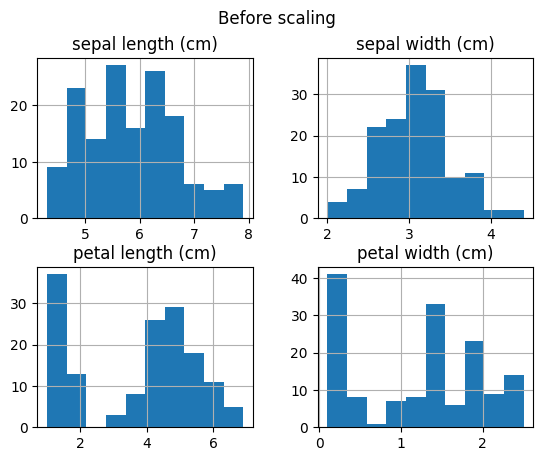

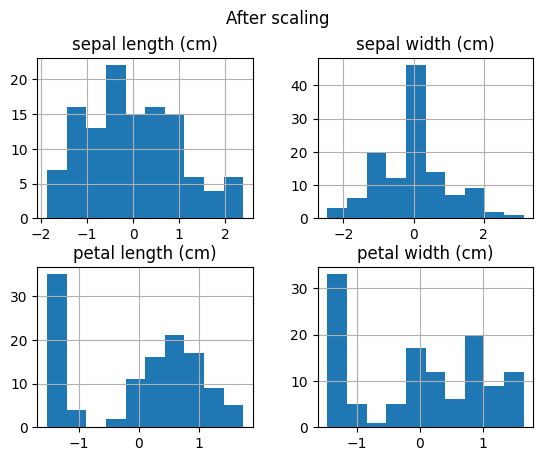

In [12]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()

# We'll use the petal length and width only for this analysis
X = iris.data
y = iris.target
# Place the iris data into a pandas dataframe
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

plt.figure()
iris_df.hist()
plt.suptitle("Before scaling")
pd.DataFrame(X_train_std, columns=iris_df.columns).hist()
plt.suptitle("After scaling")
plt.show()

#### One vs rest

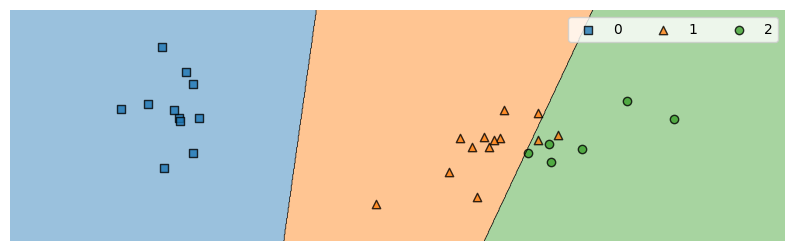

In [15]:
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA
from sklearn.svm import SVC

pca=PCA(n_components=2)
reduced_data_train=pca.fit_transform(X_train_std)
reduced_data_test=pca.transform(X_test_std)
classifier=SVC(kernel='linear', random_state=0, gamma=.10, C=1.0).fit(reduced_data_train,y_train)
plt.figure(figsize=(10,3))

classifier=SVC(kernel="linear", random_state=0, gamma=.10, C=1.0,decision_function_shape='ovr').fit(reduced_data_train,y_train)
# Plot decision boundary
plot_decision_regions(reduced_data_test, y_test, clf=classifier, legend=2)
plt.legend(ncol=3)
plt.axis("off")
plt.show()

#### One vs One

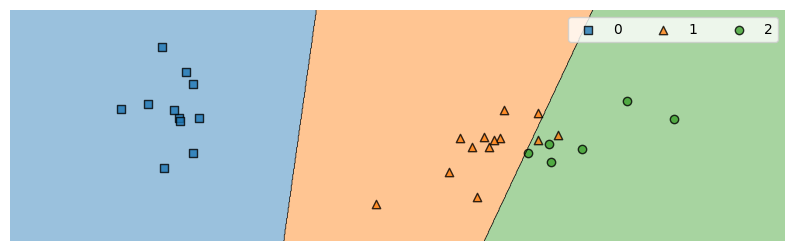

In [16]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(10,3))

classifier=SVC(kernel="linear", random_state=0, gamma=.10, C=1.0,decision_function_shape='ovo').fit(reduced_data_train,y_train)
# Plot decision boundary
plot_decision_regions(reduced_data_test, y_test, clf=classifier, legend=2)
plt.legend(ncol=3)
plt.axis("off")
plt.show()

### 7.4.2 Kernel trick
#### Regularisation 

In [18]:
from cuml.svm import SVC
from cuml.model_selection import GridSearchCV

# parameters to search
param_grid = {
    'C': [0.1, 1, 10, 100],          # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'degree': [2, 3, 4],             # Degree for the polynomial kernel
    'gamma': ['scale', 'auto'],      # Kernel coefficient
}
svc = SVC()
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Display the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

[W] [20:02:56.376934] SVC with the linear kernel can be much faster using the specialized solver provided by LinearSVC. Consider switching to LinearSVC if tranining takes too long.
Best hyperparameters:  {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best score:  0.9583333333333334


We can see that with grid search, we found the best hyperparameters and score of our dataset.

# Week 8: Nonlinear models (KNN and DT)
## 8.1 K-Nearest Neighbors (KNN)
The information below is summarized from IBM (2024). 
People often mistake KNN with unsupervised learning, KNN is in fact an **supervised learning** algorithm, and can be used both for regression and classification, but mostly classification.  

### Classification problem
The class label is assigned based on the majority of the given data points surrounding it. 

![picture](11.png)

### Regression problem
Regression uses a similar concepts to classification, but regression average the k nearest neighbors to make prediction. One is continuous value, the other is discrete value.  

Say $K=5$, and the 5 closest neighbors are 4.2, 3.8, 5.0, 4.7, 4.5. The prediction will be $\frac{4.2+3.8+5.0+4.7+4.5}{5}=4.44$.

### Compute Distance
Before the algorithm classifies things, it needs to compute the distance. In other words, there needs to be some metrics like Euclidean or Manhattan or whatever to measure how close the other data points are to our query point (IBM, 2024).

### Best number of neighbours (K)
We need to choose the most optimal number of $K$ in order for our classification to perform well. Choosing lower number of $k$, meaning focusing on the close region, this has the higher change of overfitting. The opposite can be said for high $k$, this can cause underfitting. We can use grid search to search for the optimal number of $k$.

![picture](12.png)

## 8.2 Decision trees
The information below is from Géron, A. (2019).

The text discusses the training, visualizing, and making predictions with Decision Trees. Then the CART training algorithm, and how to regularize trees for regression tasks. Finally is on the limitations of Decision Trees.

### Training and Visualizing a Decision Tree

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [4]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="iris_tree.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

![picture](iris_tree.png)

### Making prediction
Suppose there is a iris flower, and the algorithm wants to classify it. Start off with the *root node* (depth 0, top node): this node asks if $\text{petal length} \leq 2.45$, if yes then move down the leaf node (node that doesn't have child node) or the root's left child node (depth 1, left), which classifies the iris flower as `setosa`. 

If say find another flower, but this time $\text{petal length} > 2.45$, the algorithm goes down to right child node (depth 1, right), which is not a leaf node. This right node asks $\text{petal width} \leq 1.75$? If yes then the class is `versicolor`, no then `virginica`.

A node's `sample` tells us how many training instaces it applies to. Right child node (depth 1) has 100 instances where $\text{petal length} > 2.45$. In those 100, 54 has a $\text{petal width} < 1.75$.

The `value` shows the classification of training instaces. Take the botton right node, there are 0 *setosa*, 1 *versicolor*, and 45 *virginica*. It made 1 mistake. The `gini` measures the purity of a node, with 0 being the purest. The formula is 
$$
G_i = 1 - \sum_{k=1}^np_{i,k^2}
$$
where $p_{i,k^2}$ is the ratio of class $k$ instances among the training instances in $i^{th}$ node.

We can calculate the purity for bottom left node: $1-(0/46)^2 - (1/46)^2 - (45/46)^2 = 0.0425 = 0.043$

Note: sklearn uses **CART** algorithm, whcih produces only binary trees. (yes/no answer), however algorithm like **ID3** produces nodes that have more than 2 children.

This picture represents the decision tree's boundaries

![picture](13.png)

On the left hand where depth 0 shows a thick line because the *gini* is pure. For the right hand side where the *gini* is impure, so there are more splits.
Since we can clearly intepret the decisions from Decision Trees, we can say this model is **white box model**. Models like Random Forest and NN are **black box models** because those models are hard to intepret the reasons for their predictions.

### Estimating Class Probabilities
A Decision Tree can estimate the probability of what class an instance belongs to by traversing the tree to the find leaf node for that instance. For example, take a flower where petals are 5cm long and 1.5cm wide. Looking at the decision boundary, we can see that this flower is versicolor. It belongs to depth 1 where the probabilities for Iris setosa (0/54) is 0%, Iris versicolor (49/54) is 90.7%, and Iris virginica (5/54) is 9.3%. 

In [6]:
display(tree_clf.predict_proba([[5, 1.5]]))
display(tree_clf.predict([[5, 1.5]]))

array([[0.        , 0.90740741, 0.09259259]])

array([1])

Take another example with petals 6cm long and 2cm wide, it would be virginica.

In [14]:
display(tree_clf.predict_proba([[6, 2]]))
display(tree_clf.predict([[6, 2]]))

array([[0.        , 0.02173913, 0.97826087]])

array([2])

### The CART Training Algorithm
Classification and Regression Tree or CART algorithm train Decision Trees (aka "growing" trees). The algorithm works by splitting into two subsets using a single feature $k$ and a threshold $t_k$ ($\text{petal length} \leq 2.45$). To choose the pair ($k$ and $t_k$), it searches for the pair that gives the purest subsets. This process repeats itself until it reaches the maximum depth (hyperparameter `max_depth`), or can not find a split to reduce the impurity. There are a few other hyperparameters. The formula for CART with the cost function that the algorithm tries to minimize is:
$$
J(k,t_k) = \frac{m_{\text{left}}}{m}G_{\text{left}} + \frac{m_{\text{right}}}{m}G_{\text{right}}
$$
where 
- $G_{\text{left/right}}$ measures the impurity of the left/right subset
- $m_{\text{left/right}}$ is the number of instances in the left/right subset

This is a greedy algorithm where it searches for the lowest possible impurity split from top down, which can lead to overfitting. 

### Gini Impurity or Entropy
Impurity and Entropy are two measurement for Gini. A set's entropy is zero when it contains instances of only one class. The formula for entropy is:
$$
H_i = -\sum^n_{k=1, p_{i,k^{\neq 0}}}p_{i,k}log_2(p_{i,k})
$$
In depth 2, the entropy is $–(49/54) log2 (49/54) – (5/54) log2 (5/54) ≈ 0.445$.

Choosing between one of the 2 is not really imporant.

### Regularization Hyperparameters
Decision Tree is a *nonparametric model*, which means there are less default parameters determined, and we need to define them. Unlike *parametric model* like Linear Regression where there are many default parameters. Since Decision Tree is a nonparametric model, and the model is trying to find the lowest possible impurity split from top down, this can cause overfitting.

Hyperparameters are regularization: `max_depth` means max split. In DecisionTreeClassifier we have `min_samples_split` = minimum number of samples a node must have before split; `min_samples_leaf` = minimum number of samples a leaf must have; `min_weight_fraction_leaf` = same as `min_samples_leaf` but expressed as fraction of the total number of weighted instaces. More on the website>

### Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

![picture](14.png)

Now instead of predicting a class for each node, it predicts a value. Say a instance $x_1=0.6$, and transverse starting from the root node, we reach a leaf node that predicts `value=0.111`. This prediction is the average target value of 110 `samples` in the leaf node, and the `mse` is 0.015 over the 110 instances.

The predicted value for each region is always the average target value of the instances in that region. 

![picture](15.png)

The CART algorithm minimizes MSE instead of purity. The formula is:
$$
J(k,t_k) = \frac{m_{\text{left}}}{m}\text{MSE}_{\text{left}} + \frac{m_{\text{right}}}{m}\text{MSE}_{\text{right}}
$$
where 
- $\text{MSE}_{\text{node}} = \sum_{i \in \text{node}}(\hat{y}_{\text{node}} - y^{(i)})^2$
- $\hat{y}_{\text{node}} = \frac{1}{m_{\text{node}}}\sum_{i \in \text{node}}y^{(i)}$

Just like classification, regression can overfit if no restriction is put into place.

![picture](16.png)

### Instability
One of the thing is that Decision Tree loves orthogonal decision boundaries (all splits are perpendicular to an axis). This makes the boundary unnecessarily convoluted and may not generalize well.

![picture](17.png)

Another thing is that Decision Tree is very sensitive to small variations in the training data. If we were to remove some extreme value, the model will look vastly different. Even with the same training set, the output decision boundary can be different unless we set `random_state`. This can be solve using **Random Forest** (Géron, 2019).

### Post and Pre-Pruning
The information below is from Anand (2020).

Pruning just means to remove braches of the decision tree to overcome overfitting. This can be achieved by post and pre-pruning. 

#### Post Pruning (Backward pruning)
This technique is used after constructing the decision tree. We will control the `max_depth` and `min_samples_split` using `cost_complexity_pruning`. We will be using the breast_cancer dataset.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [22]:
X,y=load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
clf=DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)
y_train_predicted=clf.predict(X_train)
y_test_predicted=clf.predict(X_test)

display("Training accuracy:", accuracy_score(y_train,y_train_predicted))
display("Testing accuracy:", accuracy_score(y_test,y_test_predicted))

'Training accuracy:'

1.0

'Testing accuracy:'

0.8811188811188811

##### Visualizing Decision Tree

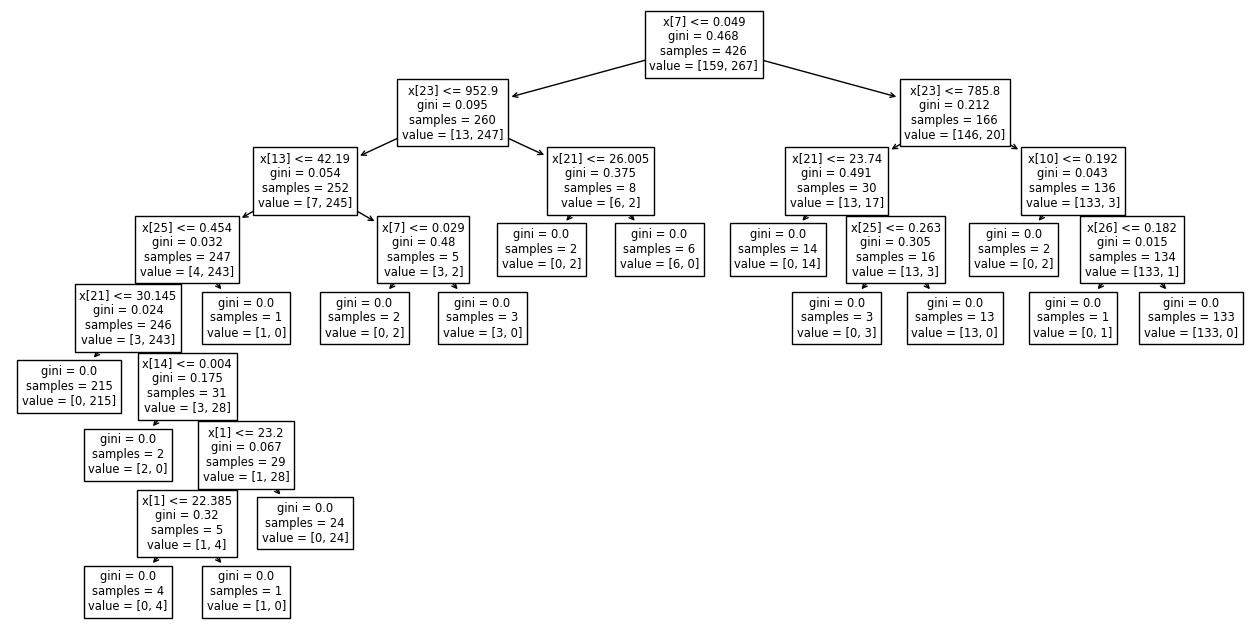

In [24]:
plt.figure(figsize=(16,8))
tree.plot_tree(clf)
plt.show()

##### Post-Pruning operation
Use `cost_complexity_pruning` technique to prune the branches of decision tree.

In [26]:
path=clf.cost_complexity_pruning_path(X_train,y_train)

# path variable gives two things ccp_alphas and impurities
ccp_alphas,impurities=path.ccp_alphas,path.impurities
print("ccp alpha wil give list of values :",ccp_alphas)
print("***********************************************************")
print("Impurities in Decision Tree :",impurities)

ccp alpha wil give list of values : [0.         0.00226647 0.00464743 0.0046598  0.0056338  0.00704225
 0.00784194 0.00911402 0.01144366 0.018988   0.02314163 0.03422475
 0.32729844]
***********************************************************
Impurities in Decision Tree : [0.         0.00453294 0.01847522 0.02313502 0.02876883 0.03581108
 0.04365302 0.05276704 0.0642107  0.0831987  0.10634033 0.14056508
 0.46786352]


`ccp_alphas` gives the min leaf value of decision tree, each `ccp_alpha` create different classifier and choose the best out of it

In [27]:
clfs=[]   # will store all the models here
for ccp_alpha in ccp_alphas:
    clf=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf.fit(X_train,y_train)
    clfs.append(clf)
print("Last node in Decision tree is {} and ccp_alpha for last node is {}".format(clfs[-1].tree_.node_count,ccp_alphas[-1]))

Last node in Decision tree is 1 and ccp_alpha for last node is 0.3272984419327777


Visualizing the accuracy score for train and test set.

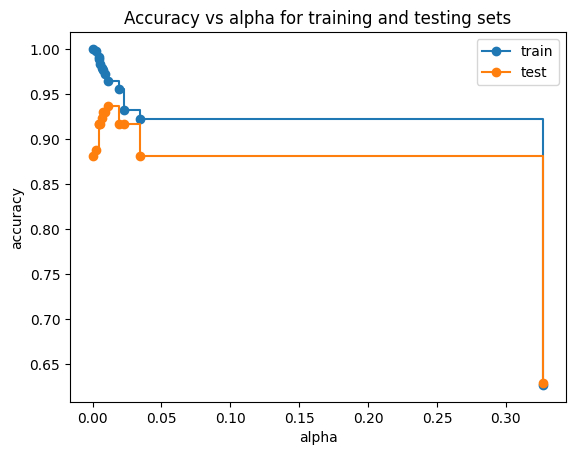

In [28]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",drawstyle="steps-post")
ax.legend()
plt.show()

Following the bias and variance tradeoff, we choose that have low bias (low training error), and low variance (low test error). That value is $\text{alpha} = 0.02$.

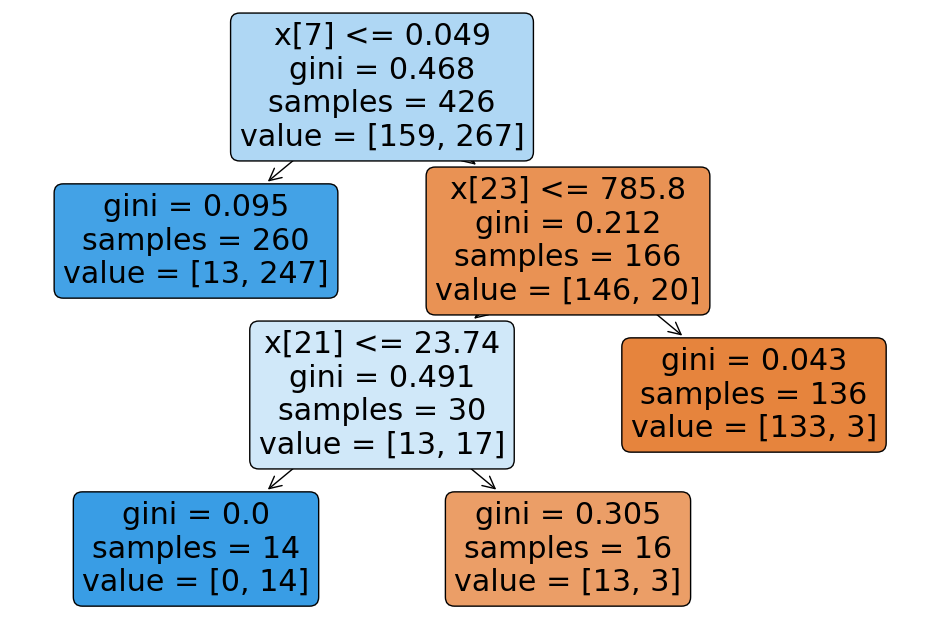

In [29]:
clf=DecisionTreeClassifier(random_state=0,ccp_alpha=0.02)
clf.fit(X_train,y_train)
plt.figure(figsize=(12,8))
tree.plot_tree(clf,rounded=True,filled=True)
plt.show()

In [30]:
accuracy_score(y_test,clf.predict(X_test))

0.916083916083916

We can an improvement after post pruning the decision tree.

#### Pre-Pruning
Use GridSearch to search for the most optimal hyperparameter.

In [32]:
from sklearn.model_selection import GridSearchCV
grid_param={"criterion":["gini","entropy"],
             "splitter":["best","random"],
             "max_depth":range(2,50,1),
             "min_samples_leaf":range(1,15,1),
             "min_samples_split":range(2,20,1) 
            }
grid_search=GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs=-1)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(ccp_alpha=0.02, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 50),
                         'min_samples_leaf': range(1, 15),
                         'min_samples_split': range(2, 20),
                         'splitter': ['best', 'random']})

In [37]:
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'random'}


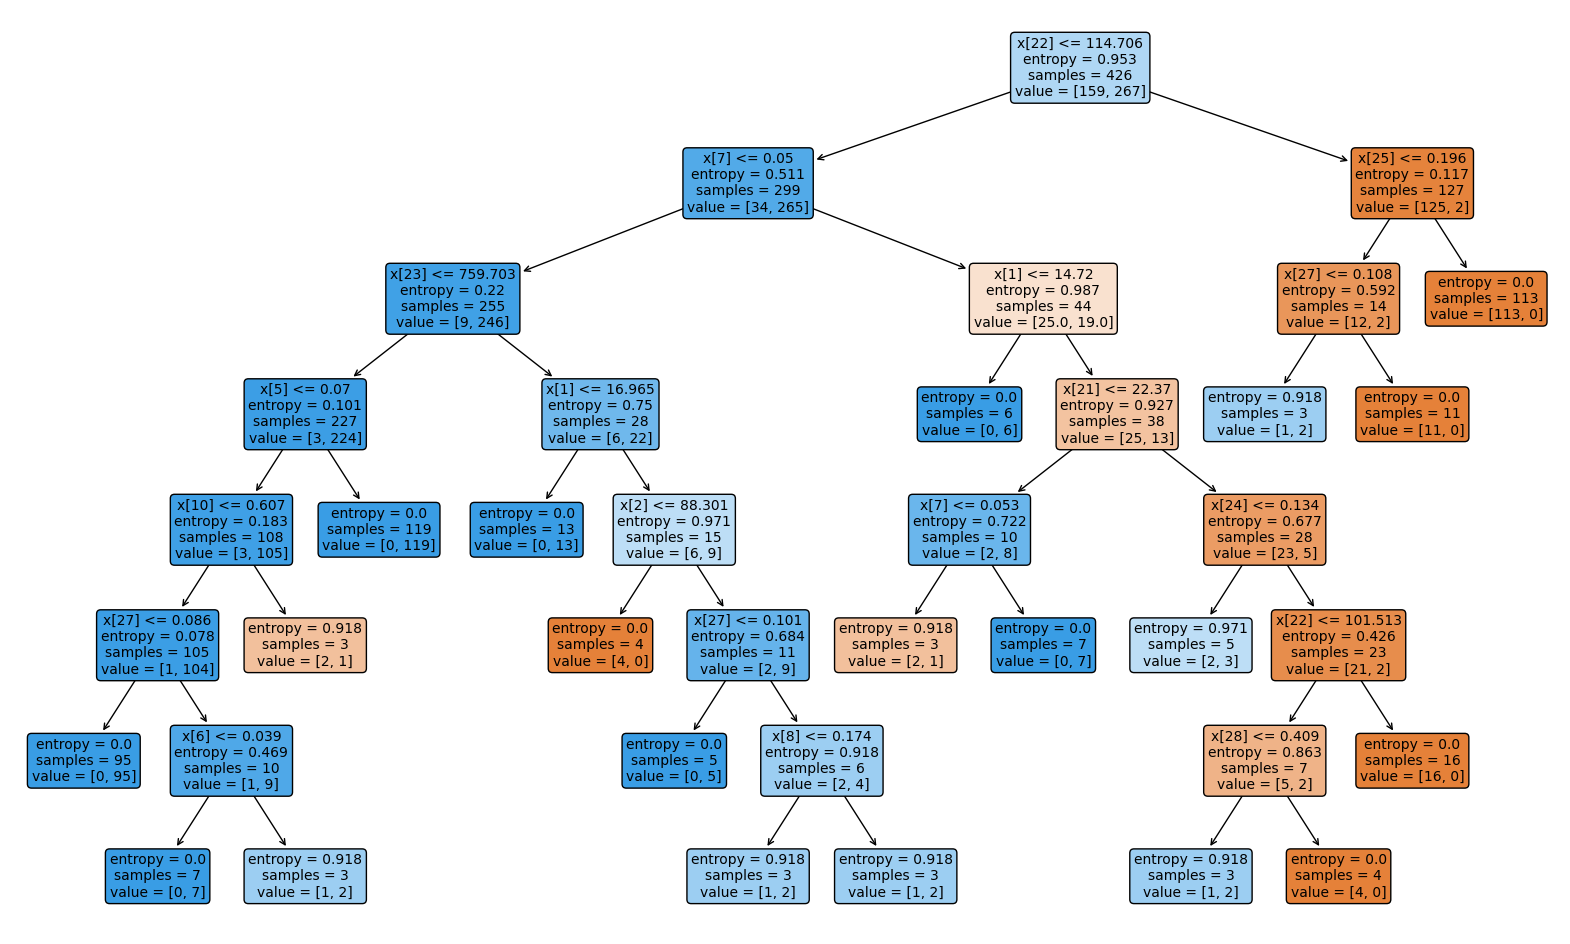

In [38]:
clf=DecisionTreeClassifier(criterion= 'entropy',max_depth= 8,min_samples_leaf= 3,min_samples_split= 2,splitter= 'random')
clf.fit(X_train,y_train)
plt.figure(figsize=(20,12))
tree.plot_tree(clf,rounded=True,filled=True)
plt.show()

In [39]:
y_predicted=clf.predict(X_test)
accuracy_score(y_test,y_predicted)

0.9440559440559441

I think its best to use pre-pruning, and the post-pruning for the best results.

### Feature Importance using DT


In [47]:
feature_importances = clf.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_importances

array([0.63410591, 0.15102941, 0.03826528, 0.03183993, 0.02881244,
       0.02368587, 0.02323228, 0.01843405, 0.01716842, 0.01125016,
       0.00860701, 0.0085022 , 0.00506704, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

## 8.3 KNN in Python
We will be using the Iris dataset

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Import the Iris data set 
from sklearn import datasets
iris = datasets.load_iris()

# divide this data into features and labels
X = iris.data
y = iris.target

print ("X is of type: {}".format(type(X)))
print ("y is of type: {}".format(type(y)))

# How does our data look
#print first 5 rows of X
print ("First 5 rows of our data: {}".format(X[:5,:]))

#print the unique labels in y
print ("unique labels: {}".format(np.unique(y)))

X is of type: <class 'numpy.ndarray'>
y is of type: <class 'numpy.ndarray'>
First 5 rows of our data: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
unique labels: [0 1 2]


We will drop 2 columns of X for easy visualisation 

In [49]:
X = X[:,:2] # Use only the first 2 columns. This is for easy plotting/visualisation
#print first 5 rows of X
print ("First 5 rows of our data: {}".format(X[:5,:]))

First 5 rows of our data: [[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]


In [51]:
from sklearn.model_selection import train_test_split

#Split the data into 80% Training and 20% Testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2, random_state=42)

print (Xtrain.shape)
print (ytrain.shape)
print (Xtest.shape)
print (ytest.shape)

Xtrain[:5,:] # first 5 rows of training data

(120, 2)
(120,)
(30, 2)
(30,)


array([[4.6, 3.6],
       [5.7, 4.4],
       [6.7, 3.1],
       [4.8, 3.4],
       [4.4, 3.2]])

Function to plot the true data points and the calculated decision boundaries of a given classifier model. Note that this visualization is for 2D and having 3 labels or less.

In [52]:
from matplotlib.colors import ListedColormap

# We define a colormap with three colors, for three labels our data
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_estimator(estimator, X, y):
    '''
    This function takes a model (estimator), 
    '''
    estimator.fit(X, y)
    # Determine the maximum and minimum mesh as a boundary
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    # Generating the points on the mesh
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    # Make predictions on the grid points
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # for color
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Original training sample
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.axis('tight')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

KNN Training Accuracy: 0.8416666666666667
KNN Testing Accuracy: 0.8


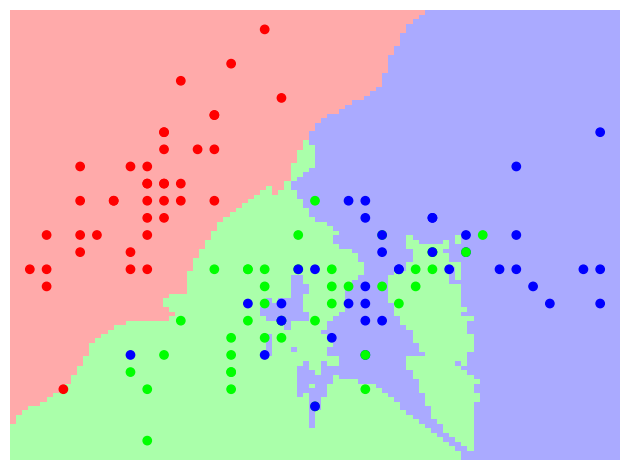

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Build a kNN using 5 neighbor nodes
knn_model = KNeighborsClassifier(n_neighbors=5)

#Fit the model using our training data
knn_model.fit(Xtrain, ytrain)

# Training Accuracy:
knn_acc = metrics.accuracy_score(ytrain, knn_model.predict(Xtrain))
print ("KNN Training Accuracy: {}".format(knn_acc))

#Testing Accuracy:
knn_acc_test = metrics.accuracy_score(ytest, knn_model.predict(Xtest))
print ("KNN Testing Accuracy: {}".format(knn_acc_test))

# Visualize the decision bounday. The points represent the true data. 
plot_estimator(knn_model, Xtrain, ytrain)

## 8.4 Decision Trees in Python
We will use the Titanic model to predicts if a passenger survived or not.

In [74]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [78]:
df = pd.read_csv('titanic_train.csv')
df = df[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Embarked']]
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])
df.dropna(axis=0, inplace=True)
df

,PassengerId,Survived,Pclass,Sex,Age,Embarked
0,1,0,3,1,22.0,2
1,2,1,1,0,38.0,0
2,3,1,3,0,26.0,2
3,4,1,1,0,35.0,2
4,5,0,3,1,35.0,2
...,...,...,...,...,...,...
885,886,0,3,0,39.0,1
886,887,0,2,1,27.0,2
887,888,1,1,0,19.0,2
889,890,1,1,1,26.0,0


In [79]:
# Split data
X = df.drop('Survived' ,axis=1)
y = df.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Pre-pruning

In [80]:
from sklearn.model_selection import GridSearchCV
grid_param={"criterion":["gini","entropy"],
             "splitter":["best","random"],
             "max_depth":range(2,50,1),
             "min_samples_leaf":range(1,15,1),
             "min_samples_split":range(2,20,1) 
            }
grid_search=GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs=-1)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=8,
                                              min_samples_leaf=3,
                                              splitter='random'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 50),
                         'min_samples_leaf': range(1, 15),
                         'min_samples_split': range(2, 20),
                         'splitter': ['best', 'random']})

In [81]:
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 48, 'min_samples_leaf': 2, 'min_samples_split': 13, 'splitter': 'random'}


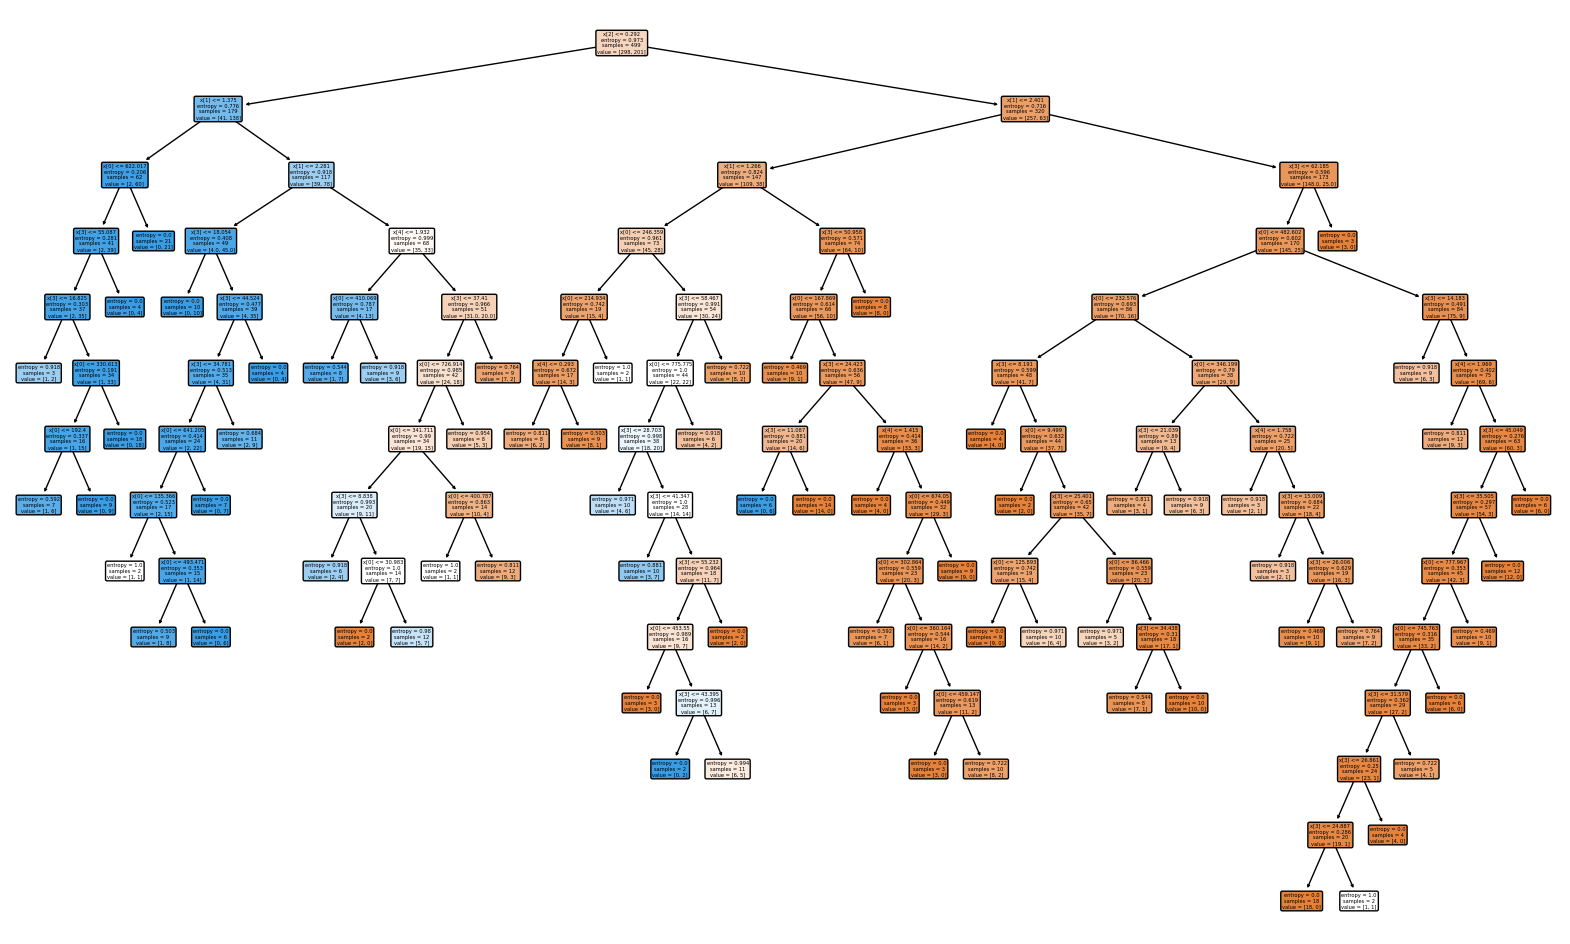

In [82]:
clf=DecisionTreeClassifier(criterion= 'entropy',max_depth= 48,min_samples_leaf= 2,min_samples_split= 13,splitter= 'random')
clf.fit(X_train,y_train)
plt.figure(figsize=(20,12))
tree.plot_tree(clf,rounded=True,filled=True)
plt.show()

In [83]:
y_predicted=clf.predict(X_test)
accuracy_score(y_test,y_predicted)

0.7581395348837209

#### Post-pruning

In [84]:
path=clf.cost_complexity_pruning_path(X_train,y_train)

# path variable gives two things ccp_alphas and impurities
ccp_alphas,impurities=path.ccp_alphas,path.impurities
print("ccp alpha wil give list of values :",ccp_alphas)
print("***********************************************************")
print("Impurities in Decision Tree :",impurities)

ccp alpha wil give list of values : [0.00000000e+00 1.74490182e-04 2.40172652e-04 6.20071199e-04
 9.63944683e-04 1.04422064e-03 1.29246626e-03 1.44568141e-03
 1.54324076e-03 2.00485642e-03 2.11822225e-03 2.18025171e-03
 2.45895206e-03 2.53037004e-03 2.55138944e-03 2.56809214e-03
 2.71890151e-03 2.79816116e-03 3.03677626e-03 3.29008739e-03
 3.29850237e-03 4.11340255e-03 4.68032283e-03 7.87525056e-03
 1.12677713e-02 1.61993339e-02 7.48193355e-02 2.35153577e-01]
***********************************************************
Impurities in Decision Tree : [0.40603161 0.4062061  0.40644628 0.40706635 0.40899424 0.41003846
 0.41262339 0.41406907 0.41715555 0.41916041 0.42551508 0.42769533
 0.43753114 0.44259188 0.44514327 0.45284754 0.45828534 0.46947799
 0.47858832 0.49174867 0.50494268 0.52139629 0.53543726 0.55906301
 0.58159855 0.66259522 0.73741456 0.97256813]


In [85]:
clfs=[]   # will store all the models here
for ccp_alpha in ccp_alphas:
    clf=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf.fit(X_train,y_train)
    clfs.append(clf)
print("Last node in Decision tree is {} and ccp_alpha for last node is {}".format(clfs[-1].tree_.node_count,ccp_alphas[-1]))

Last node in Decision tree is 1 and ccp_alpha for last node is 0.23515357653786872


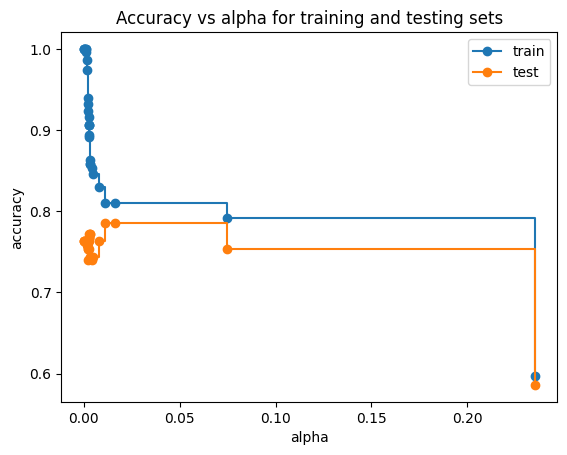

In [86]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",drawstyle="steps-post")
ax.legend()
plt.show()

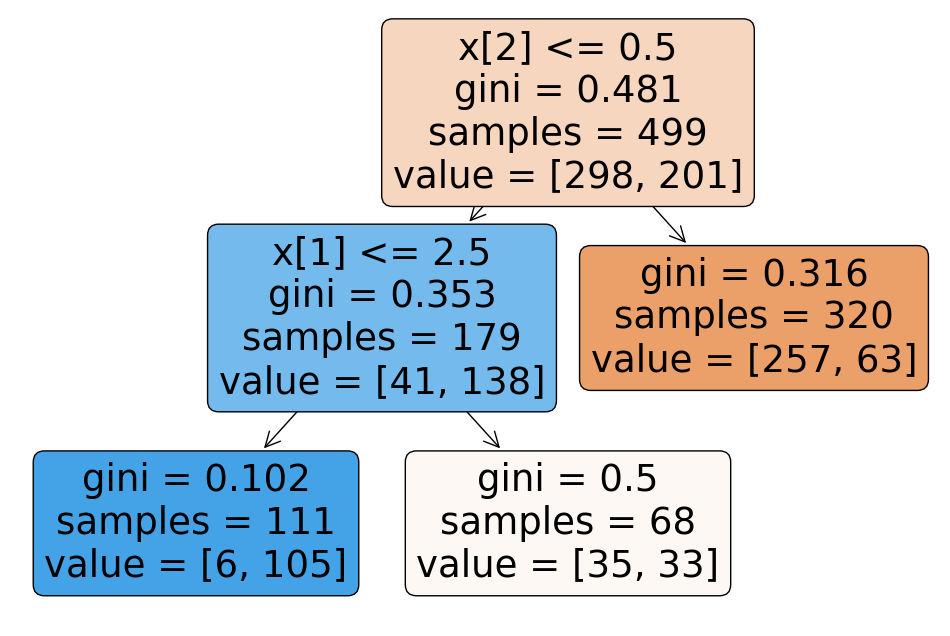

0.7813953488372093

In [88]:
clf=DecisionTreeClassifier(random_state=0,ccp_alpha=0.02)
clf.fit(X_train,y_train)
plt.figure(figsize=(12,8))
tree.plot_tree(clf,rounded=True,filled=True)
plt.show()
accuracy_score(y_test,clf.predict(X_test))

# Reflection
From this two weeks, I have learned about SVM (the nice thing about kernel trick), KNN and Decision Tree. I have also learned how to find the most optimal hyperparameters for each algorithms.

# Quiz
![picture](quiz1.png)
![picture](quiz2.png)

# References
Anand, A. (2020). Post-Pruning and Pre-Pruning in Decision Tree. [online] Medium. Available at: https://medium.com/analytics-vidhya/post-pruning-and-pre-pruning-in-decision-tree-561f3df73e65.

Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition [Book]. [online] www.oreilly.com. Available at: https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/.

IBM (2024). What is the k-nearest neighbors algorithm? | IBM. [online] www.ibm.com. Available at: https://www.ibm.com/topics/knn#:~:text=The%20k%2Dnearest%20neighbors%20(KNN.